### Objective
Explore Support Vector Machines for both classification and regression,
tune hyperparameters using Grid Search, and visualize decision
boundaries to gain geometric intuition.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.datasets import make_classification, make_regression, load_iris, load_diabetes


In [20]:
iris = load_iris()
X_class = iris.data[:, :3]
y_class = iris.target

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

print(f"Training set: {X_train_class_scaled.shape}")
print(f"Test set: {X_test_class_scaled.shape}")
print(f"Classes: {iris.target_names}")
print(f"Features: {iris.feature_names[:3]}")

Training set: (105, 3)
Test set: (45, 3)
Classes: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']


In [21]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4] 
}


svc = SVC(random_state=42)

grid_search_svc = GridSearchCV(
    estimator=svc,
    param_grid=param_grid_svc,
    verbose=1,
)
grid_search_svc.fit(X_train_class_scaled, y_train_class)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [22]:

print(f"Best Parameters: {grid_search_svc.best_params_}")
best_svc = grid_search_svc.best_estimator_
print(f"Best Estimator: {best_svc}")
y_pred_svc = best_svc.predict(X_test_class_scaled)
svc_accuracy = accuracy_score(y_test_class, y_pred_svc)
print(f"Accuracy: {svc_accuracy:.4f}")



Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Estimator: SVC(C=1, degree=2, kernel='linear', random_state=42)
Accuracy: 0.9778


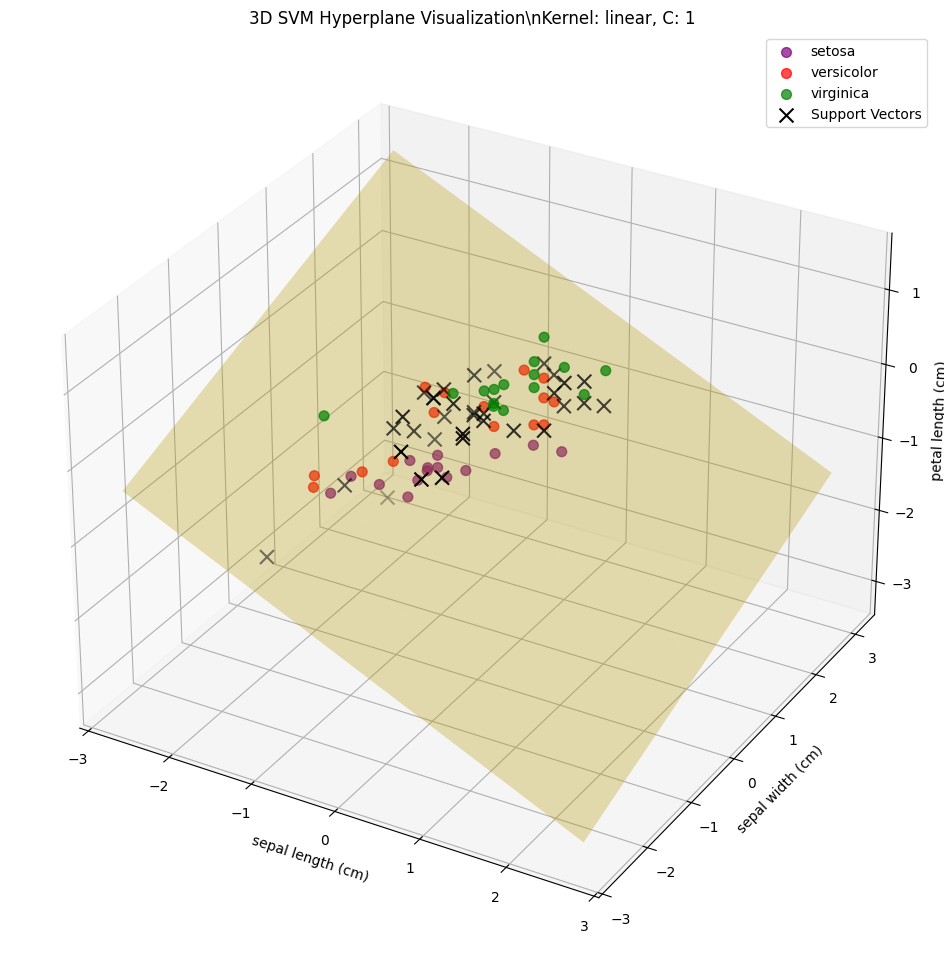

In [23]:
def plot_3d_hyperplane(X, y, model, feature_names, class_names, title):
    
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(111, projection='3d')
    colors = ['purple', 'red', 'green']
    for i, class_name in enumerate(class_names):
        mask = y == i
        ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], 
                  c=colors[i], label=class_name, alpha=0.7, s=50)
    
    if hasattr(model, 'coef_') and model.kernel == 'linear':
        coef = model.coef_[0] if len(model.coef_) == 1 else model.coef_[0]  
        intercept = model.intercept_[0] if len(model.intercept_) == 1 else model.intercept_[0]
        
        xx = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 20)
        yy = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 20)
        XX, YY = np.meshgrid(xx, yy)
        
       
        if abs(coef[2]) > 1e-10: 
            ZZ = -(coef[0] * XX + coef[1] * YY + intercept) / coef[2]
            ax.plot_surface(XX, YY, ZZ, alpha=0.3, color='gold')
    
    if hasattr(model, 'support_vectors_'):
        ax.scatter(model.support_vectors_[:, 0], 
                  model.support_vectors_[:, 1], 
                  model.support_vectors_[:, 2],
                  c='black', marker='x', s=100, label='Support Vectors')
    
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel(feature_names[2])
    ax.set_title(title)
    ax.legend()
    
    plt.show()

plot_3d_hyperplane(
    X_test_class_scaled, 
    y_test_class, 
    best_svc, 
    iris.feature_names[:3], 
    iris.target_names,
    f"3D SVM Hyperplane Visualization\\nKernel: {best_svc.kernel}, C: {best_svc.C}"
)

In [ ]:
diabetes = load_diabetes()
X_reg = diabetes.data[:, :3] 
y_reg = diabetes.target

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"Training set: {X_train_reg_scaled.shape}")
print(f"Test set: {X_test_reg_scaled.shape}")
print(f"Target range: [{y_reg.min():.1f}, {y_reg.max():.1f}]")
print(f"Features: {diabetes.feature_names[:3]}")

Training set: (309, 3)
Test set: (133, 3)
Target range: [25.0, 346.0]
Features: ['age', 'sex', 'bmi']


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [25]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'degree': [2, 3]  
}

svr = SVR()

grid_search_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
)

grid_search_svr.fit(X_train_reg_scaled, y_train_reg)

,estimator,SVR()
,param_grid,"{'C': [0.1, 1, ...], 'degree': [2, 3], 'epsilon': [0.01, 0.1, ...], 'gamma': ['scale', 'auto', ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [26]:


print(f"Best Parameters: {grid_search_svr.best_params_}")
best_svr = grid_search_svr.best_estimator_
print(f"Best Estimator: {best_svr}")

y_pred_svr = best_svr.predict(X_test_reg_scaled)
svr_r2 = r2_score(y_test_reg, y_pred_svr)
svr_mse = mean_squared_error(y_test_reg, y_pred_svr)
svr_rmse = np.sqrt(svr_mse)

print(f"R² Score: {svr_r2:.4f}")
print(f"Mean Squared Error: {svr_mse:.2f}")
print(f"Root Mean Squared Error: {svr_rmse:.2f}")



Best Parameters: {'C': 100, 'degree': 2, 'epsilon': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimator: SVR(C=100, degree=2, epsilon=0.5, gamma=0.01)
R² Score: 0.2590
Mean Squared Error: 4000.32
Root Mean Squared Error: 63.25


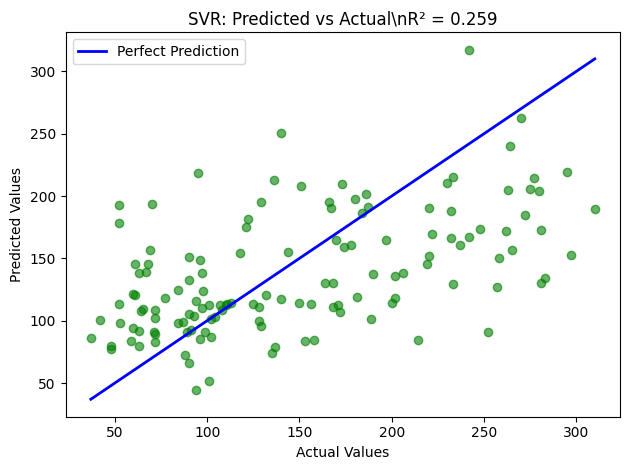

In [27]:
plt.scatter(y_test_reg, y_pred_svr, alpha=0.6, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
                'b', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'SVR: Predicted vs Actual\\nR² = {svr_r2:.3f}')
plt.legend()

plt.tight_layout()
plt.show()

## Observations

- Linear kernel works well when data is linearly separable.
- RBF kernel captures non-linear patterns better.
- Grid search helps in selecting optimal C and gamma values.
- Proper scaling significantly improves SVM performance.
